In [45]:
!pip install numpy opencv-python matplotlib
!pip install ipywidgets
!pip install pdf2image
!pip install pymupdf

In [46]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display


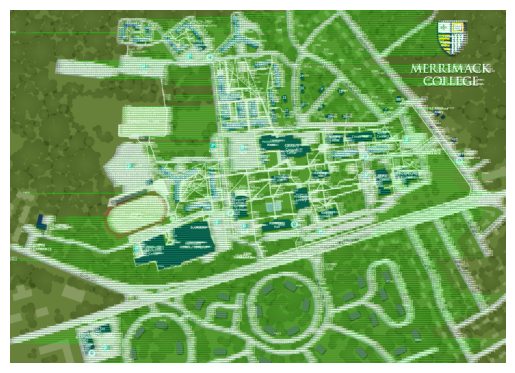

In [56]:
import fitz  # PyMuPDF
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Open the PDF file
pdf_path = 'C:/Users/Wesley/Downloads/merrimack-college-map.pdf'
doc = fitz.open(pdf_path)

# Select the first page
page = doc.load_page(0)  # 0 is the first page

# Render page to an image
pix = page.get_pixmap()

# Convert to a NumPy array
img = np.frombuffer(pix.samples, dtype=np.uint8).reshape(pix.height, pix.width, pix.n)

# Convert RGB to BGR (OpenCV format)
img_bgr = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)

# Define color ranges for blue, gray, and white pixels
blue_lower = np.array([100, 0, 0])
blue_upper = np.array([255, 100, 100])

gray_lower = np.array([100, 100, 100])
gray_upper = np.array([200, 200, 200])

white_lower = np.array([200, 200, 200])
white_upper = np.array([255, 255, 255])

# Create waypoints every 10 pixels on blue, gray, and white pixels
height, width, _ = img_bgr.shape
waypoints = []
key wapoints = []
for y in range(0, height, 10):
    for x in range(0, width, 10):
        pixel_color = img_bgr[y, x]
        if (np.all(pixel_color >= blue_lower) and np.all(pixel_color <= blue_upper)) or \
           (np.all(pixel_color >= gray_lower) and np.all(pixel_color <= gray_upper)) or \
           (np.all(pixel_color >= white_lower) and np.all(pixel_color <= white_upper)):
            waypoints.append((x, y))

# Draw lines between waypoints
for i in range(len(waypoints) - 1):
    cv2.line(img_bgr, waypoints[i], waypoints[i + 1], (0, 255, 0), 1)

# Add text to the waypoints
for i, point in enumerate(waypoints):
    cv2.putText(img_bgr, f'P{i+1}', (point[0] + 1, point[1] - 1), cv2.FONT_HERSHEY_SIMPLEX, 0.3, (255, 255, 255), 1)

# Display the image
plt.imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()